In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df['Gender'] = ['Male' if x == 0 else 'Female' for x in df['gender_Female']]


In [5]:
df = df.rename(columns={'gender': 'Gender', 'SeniorCitizen' : 'SeniorCitizen', 'tenure' : 'Tenure', 'PhoneService' : 'PhoneService', 'MultipleLines' : 'MultipleLine', 'InternetService' : 'InternetService', 
                        'OnlineSecurity' : 'OnlineSecurity', 'OnlineBackup' : 'OnlineBackup'})

In [6]:
print('Number of uniques values of Gender is {}'.format(df['Gender'].nunique()))
print('Number of uniques values of Senior Citizen is {}'.format(df['SeniorCitizen'].nunique()))
print('Number of uniques values of Tenure is {}'.format(df['Tenure'].nunique()))
print('Number of uniques values of PaymentMethod is {}'.format(df['PaymentMethod'].nunique()))

Number of uniques values of Gender is 2
Number of uniques values of Senior Citizen is 2
Number of uniques values of Tenure is 73
Number of uniques values of PaymentMethod is 4


df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df

In [7]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLine,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
df['TotalCharges'].dtype

dtype('float64')

In [10]:
df.dropna(how = 'any', inplace = True)
print(df.isnull().sum()/len(df)*100)

customerID          0.0
Gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
Tenure              0.0
PhoneService        0.0
MultipleLine        0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [11]:
df=df.drop(['customerID'],axis=1)

In [12]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [13]:
df.dtypes

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLine         object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLine,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes', 0:'No'})

In [17]:
#define numerical & categorical columns
numeric_features = {feature for feature in df.columns if df[feature].dtype != 'O'}

categorical_features = {feature for feature in df.columns if df[feature].dtype == 'O'}

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : {'TotalCharges', 'MonthlyCharges', 'Tenure'}
We have 17 categorical features : {'OnlineBackup', 'StreamingTV', 'PaymentMethod', 'Partner', 'DeviceProtection', 'TechSupport', 'InternetService', 'SeniorCitizen', 'MultipleLine', 'StreamingMovies', 'Gender', 'OnlineSecurity', 'Contract', 'PaperlessBilling', 'Dependents', 'PhoneService', 'Churn'}


In [18]:
df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLine        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

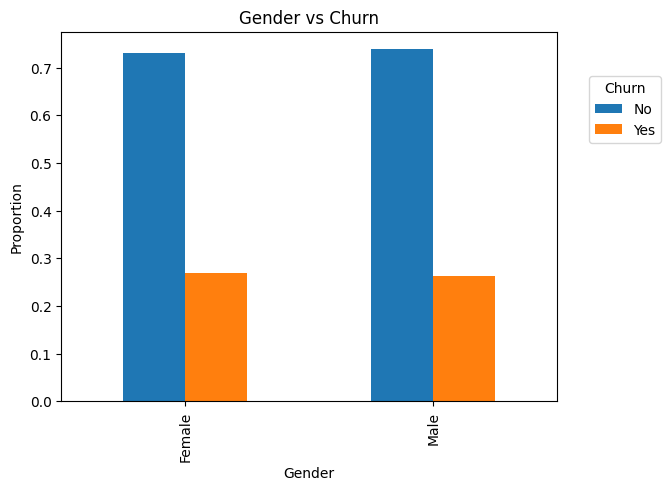

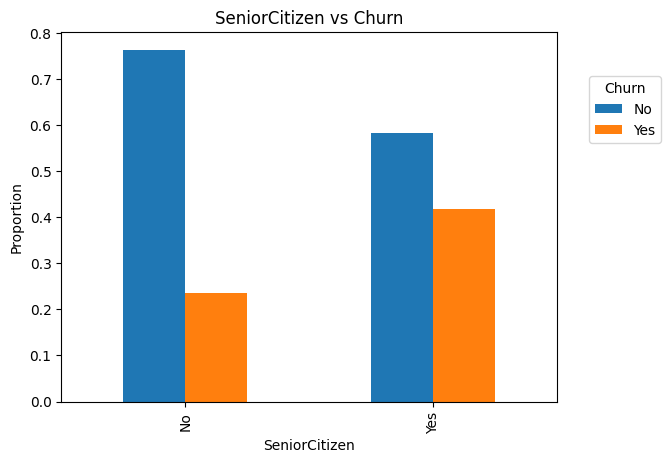

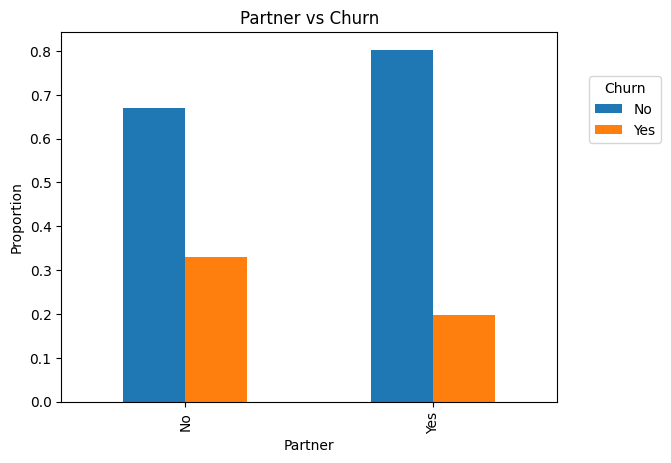

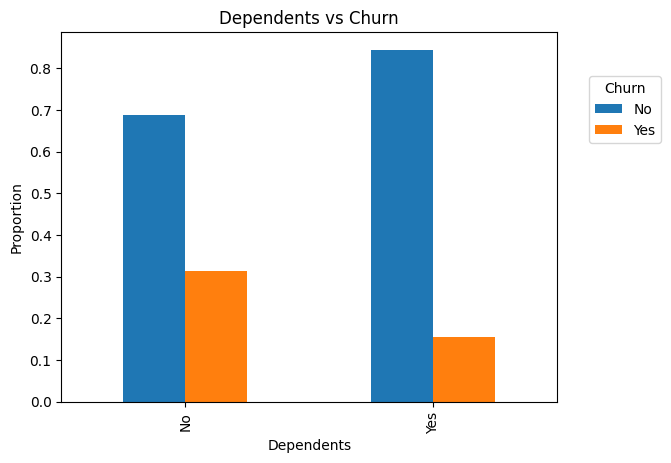

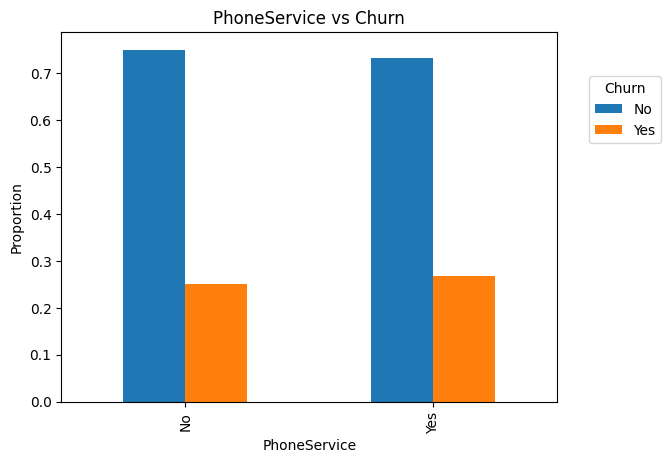

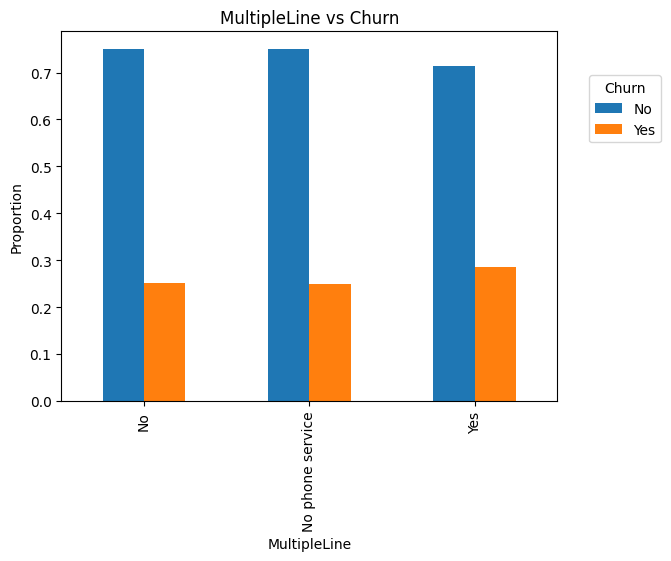

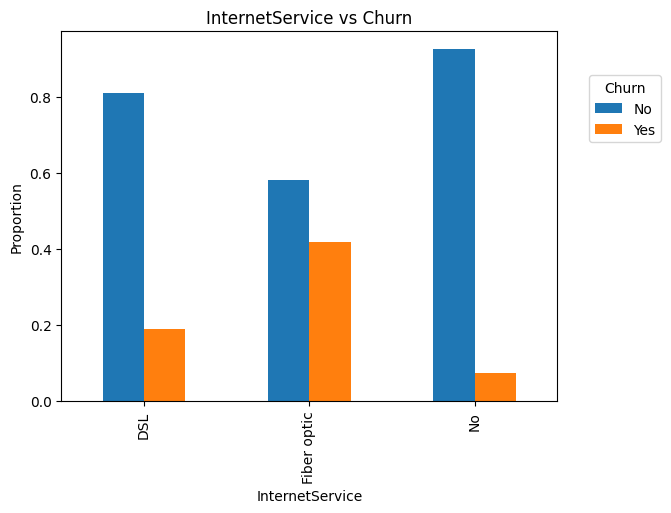

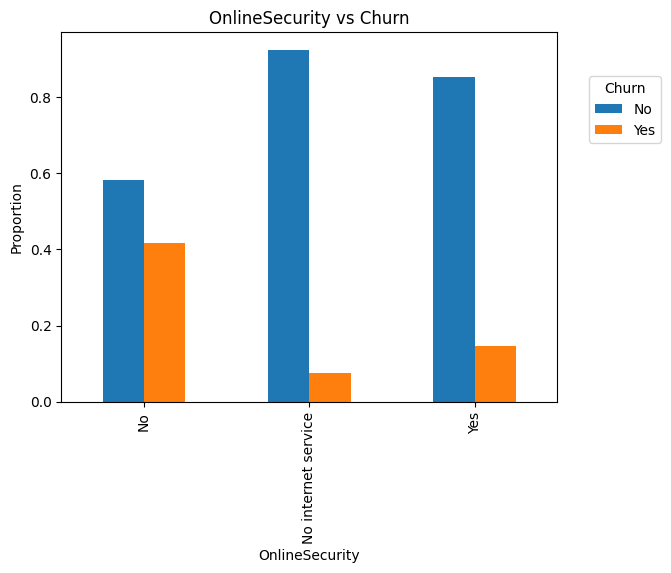

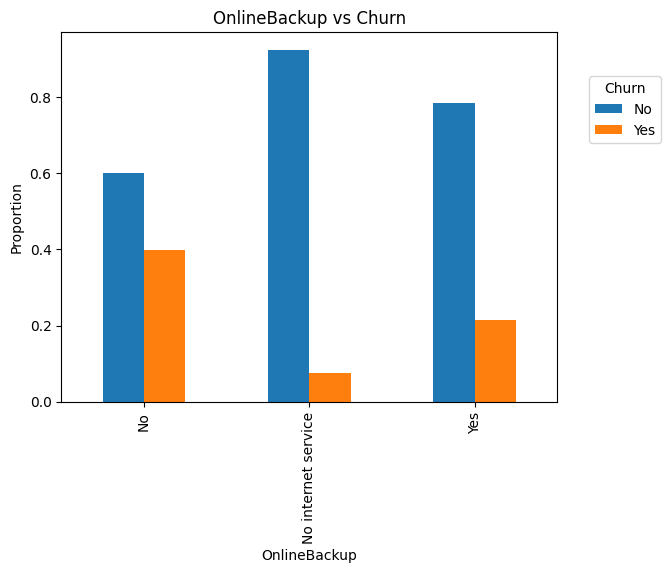

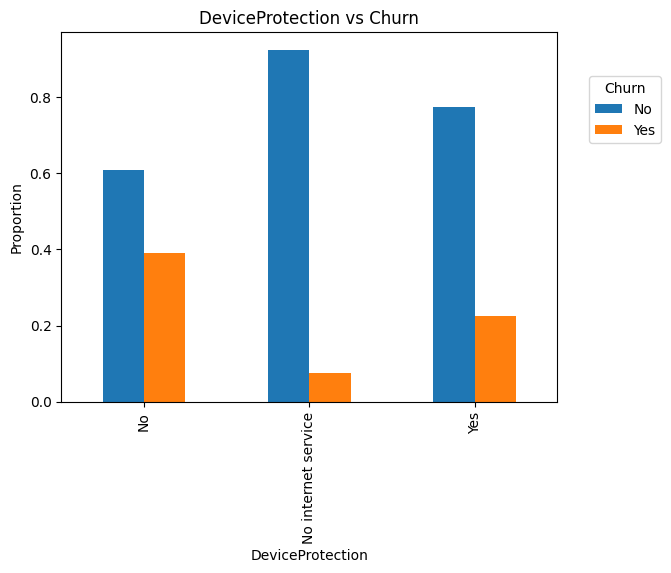

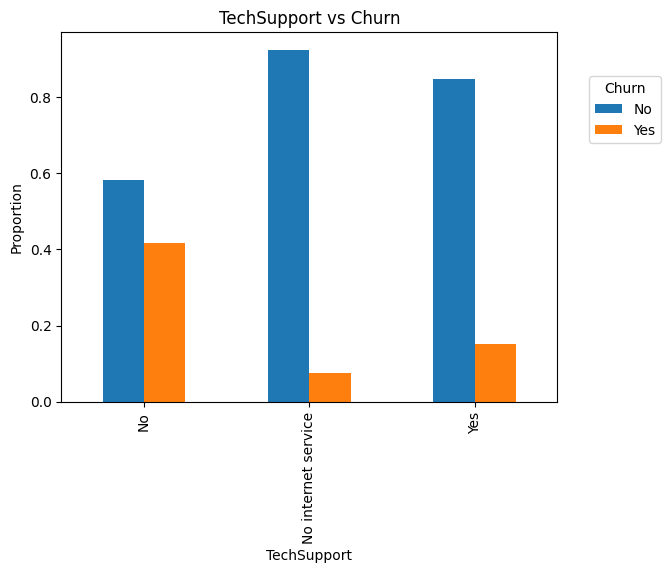

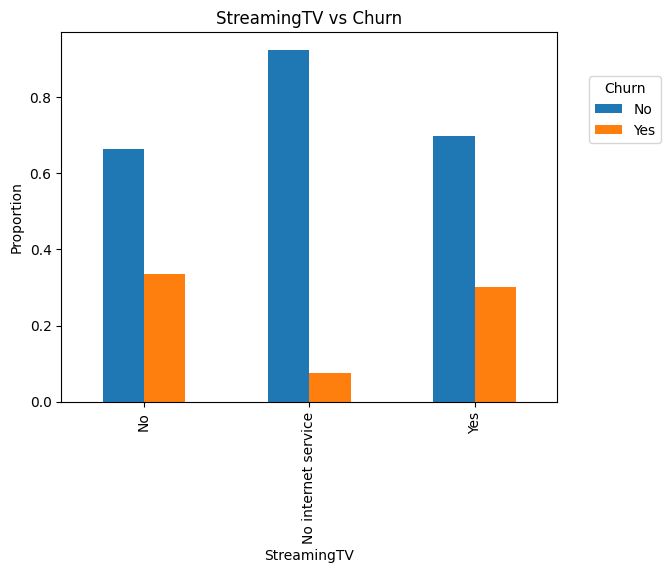

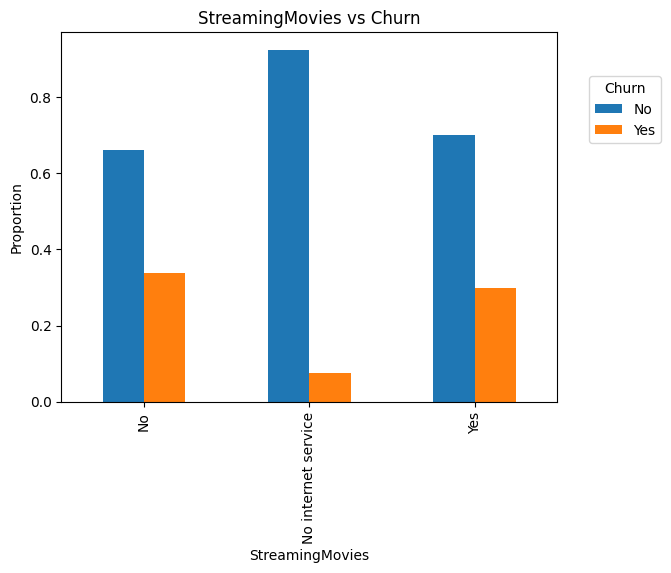

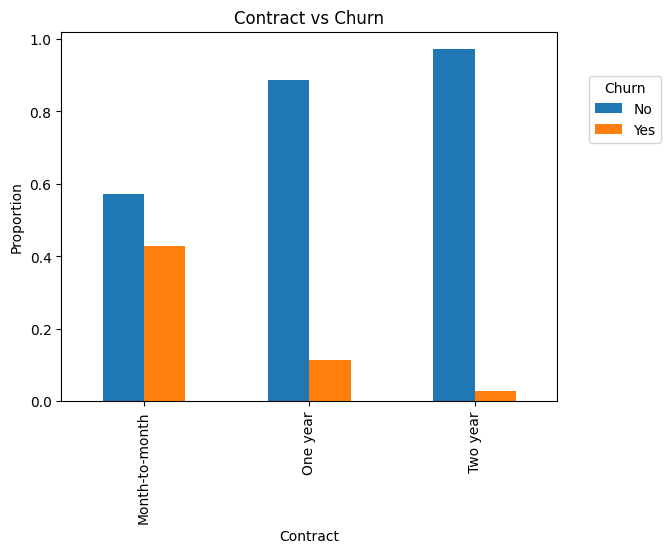

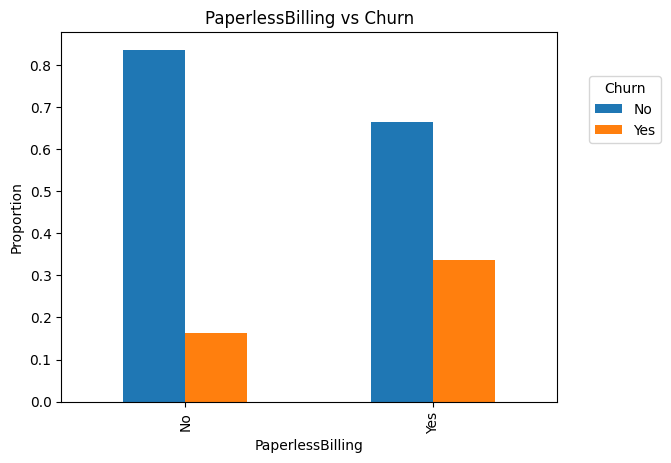

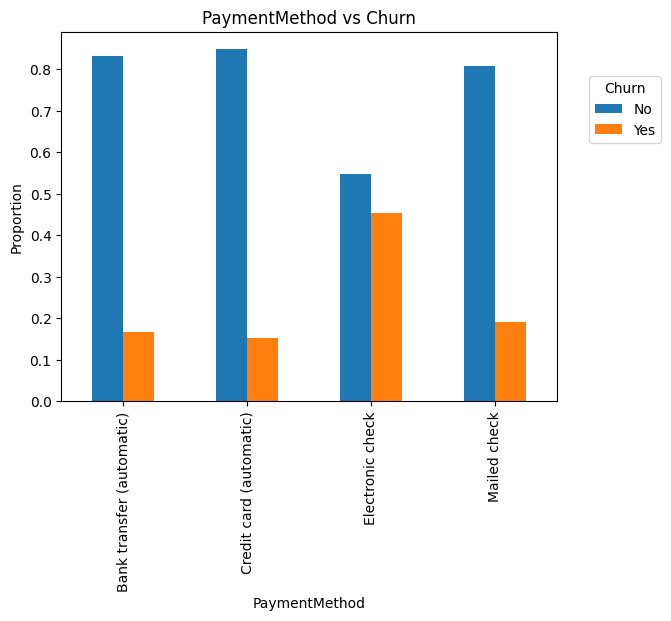

In [19]:
# Define the target variable
target = 'Churn'

# Iterate over each column and generate a separate bar chart for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        if col != target:
            # Group the data by the categorical column and target variable
            groupby = df.groupby([col, target]).size().reset_index(name='count')
            
            # Pivot the data to create a stacked bar chart
            pivoted = groupby.pivot(index=col, columns=target, values='count')
            
            # Calculate the proportions and plot the bar chart
            proportions = pivoted.apply(lambda x: x / x.sum(), axis=1)
            ax = proportions.plot(kind='bar', stacked=False)
            
            # Add titles and labels
            ax.set_title(f'{col} vs {target}')
            ax.set_xlabel(col)
            ax.set_ylabel('Proportion')
            ax.legend(title=target, bbox_to_anchor=(1.05, 0.9), loc='upper left')
            
            plt.show()

In [ ]:
# Define the target variable
target = 'Churn'

# Iterate over each column and generate a separate bar chart for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        if col != target:
            # Group the data by the categorical column and target variable
            groupby = df.groupby([col, target]).size().reset_index(name='count')       
         
            # Pivot the data to create a stacked bar chart
            pivoted = groupby.pivot(index=col, columns=target, values='count')
            
            # Plot the bar chart
            ax = pivoted.plot(kind='bar', stacked=False)
            
            # Add titles and labels
            ax.set_title(f'{col} vs. {target}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
            
            plt.show()


In [20]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLine,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLine', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# Get the max tenure
print(df['Tenure'].max())

# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenuregroup'] = pd.cut(df['Tenure'], range(1, 80, 12), right=False, labels=labels)

print(df['tenuregroup'].value_counts())

72
tenuregroup
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

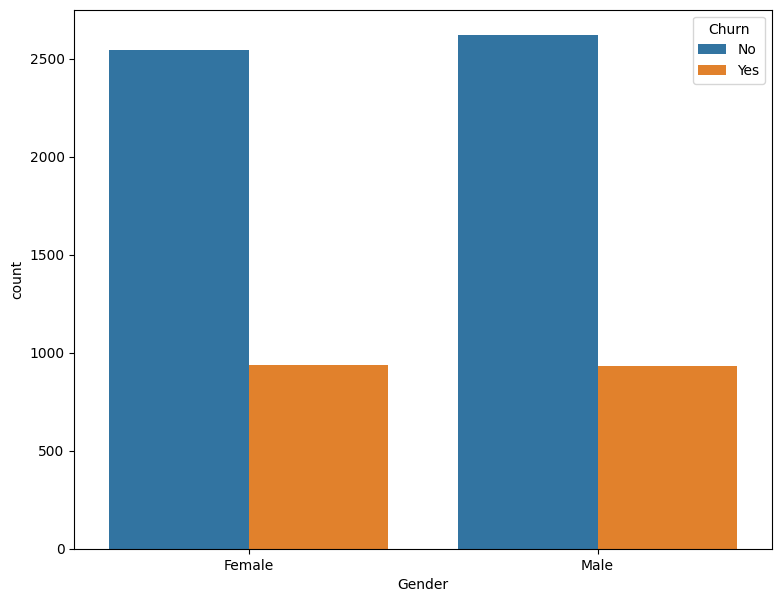

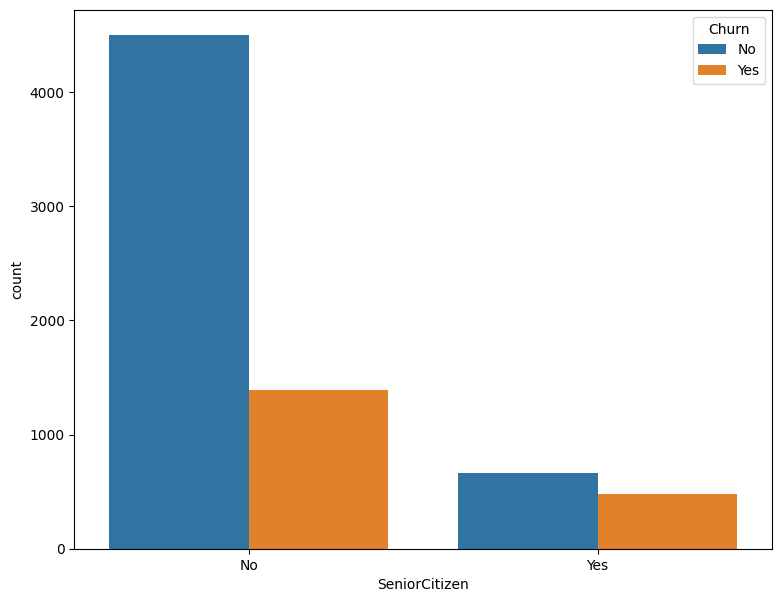

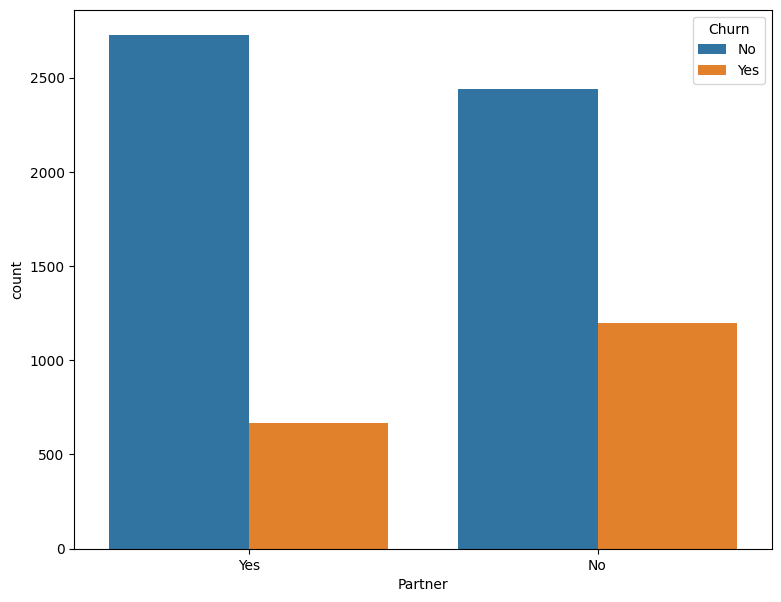

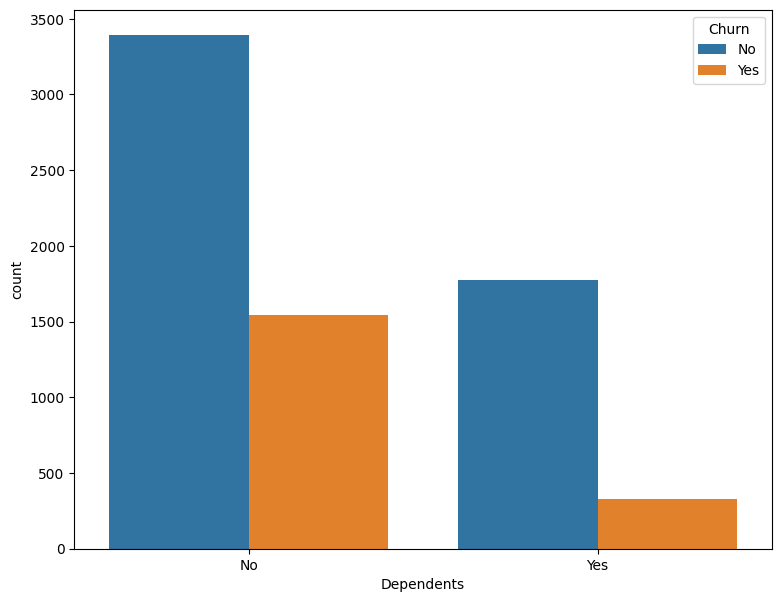

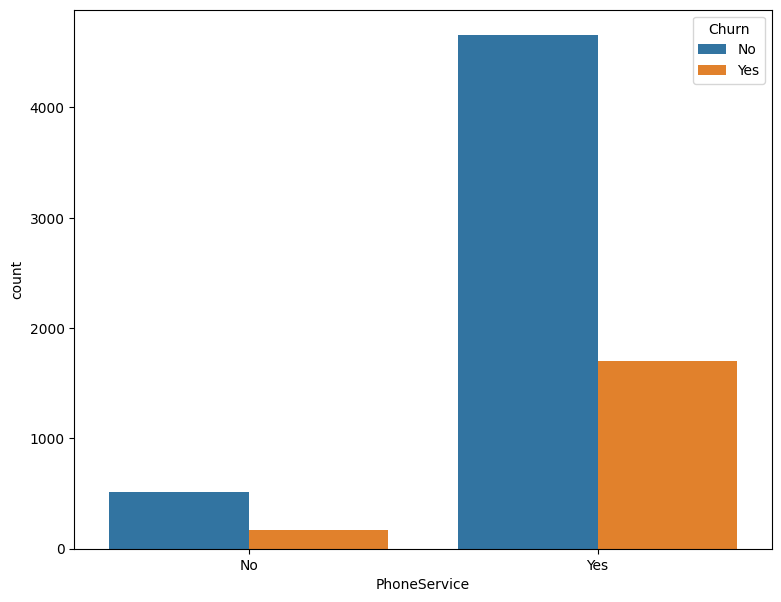

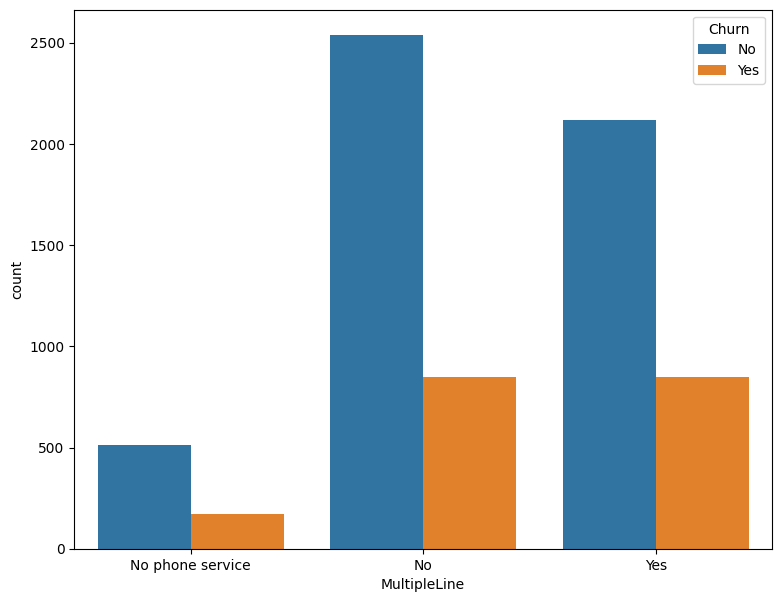

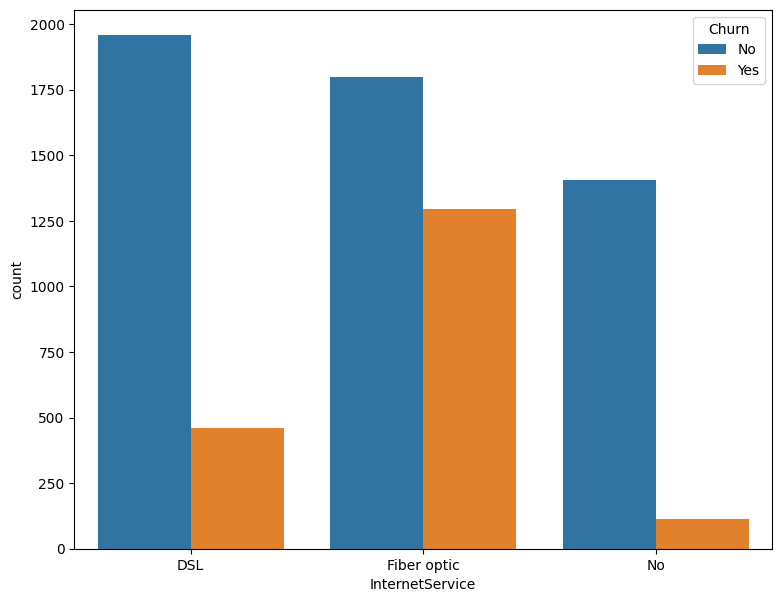

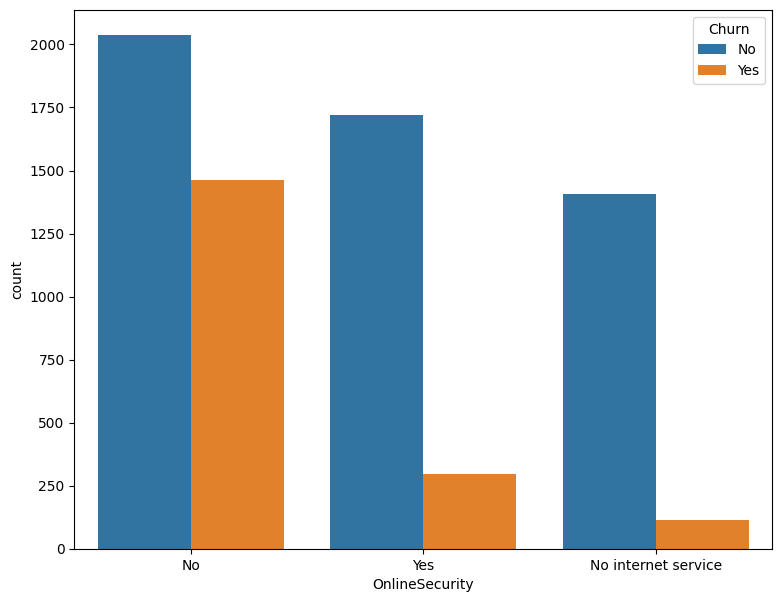

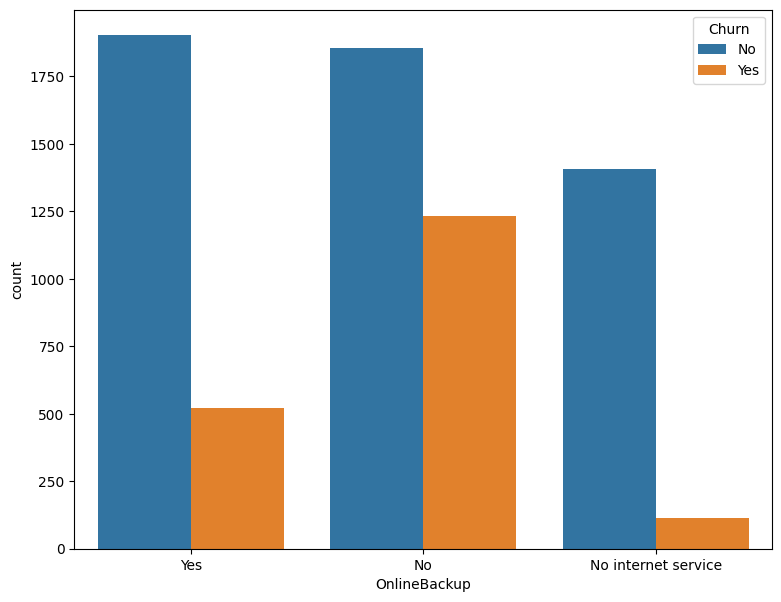

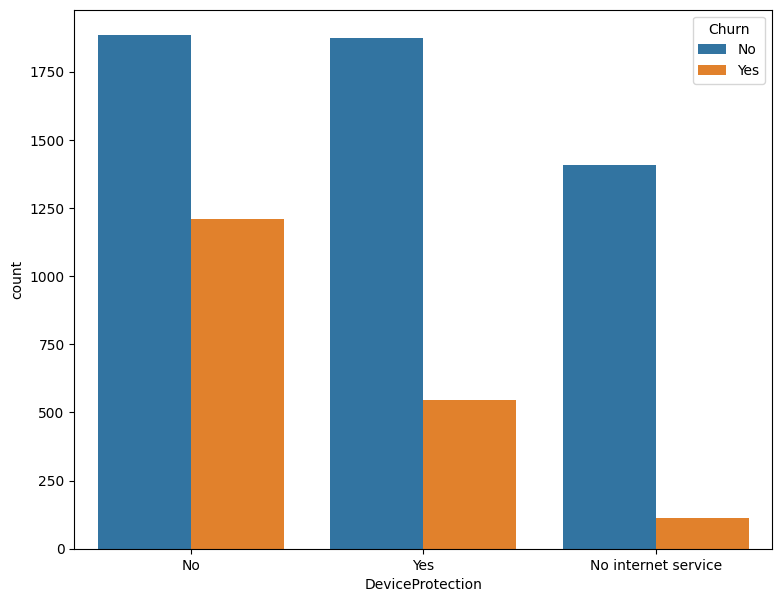

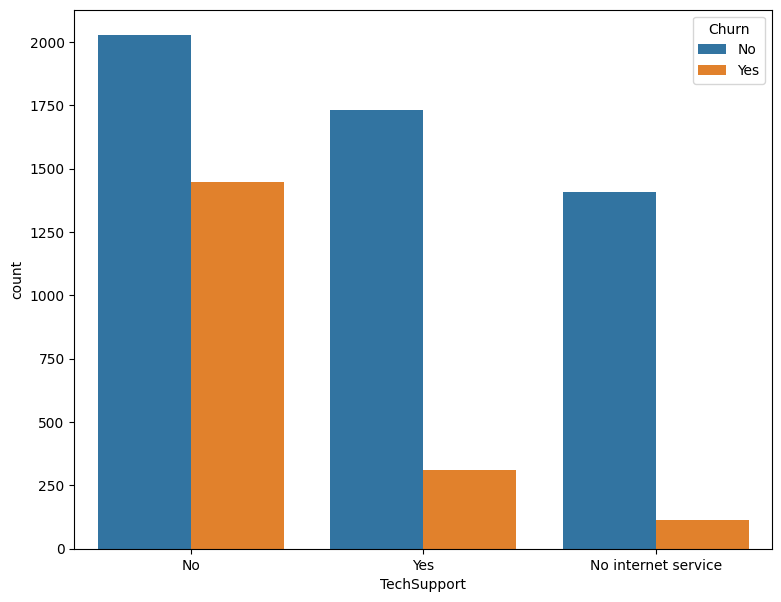

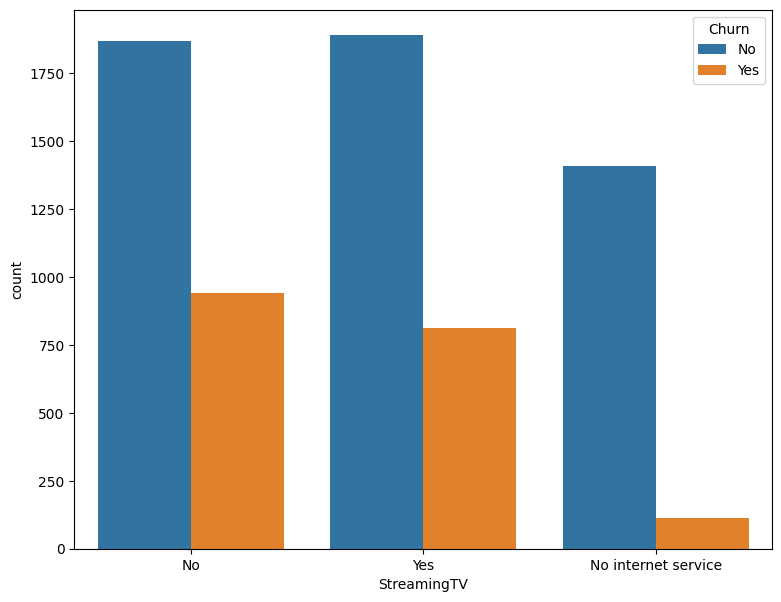

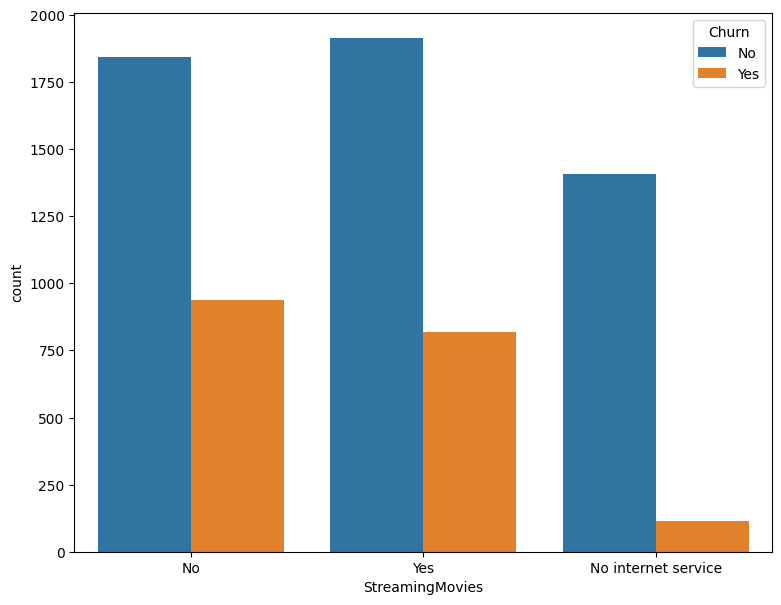

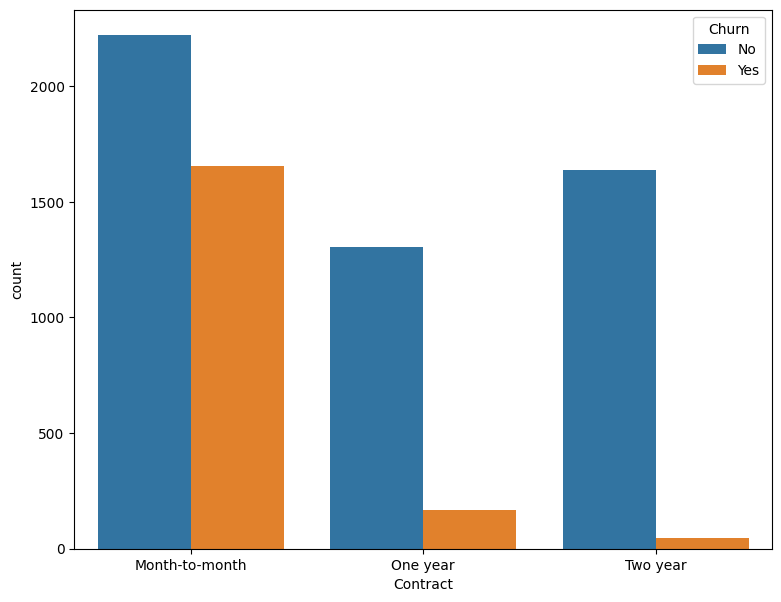

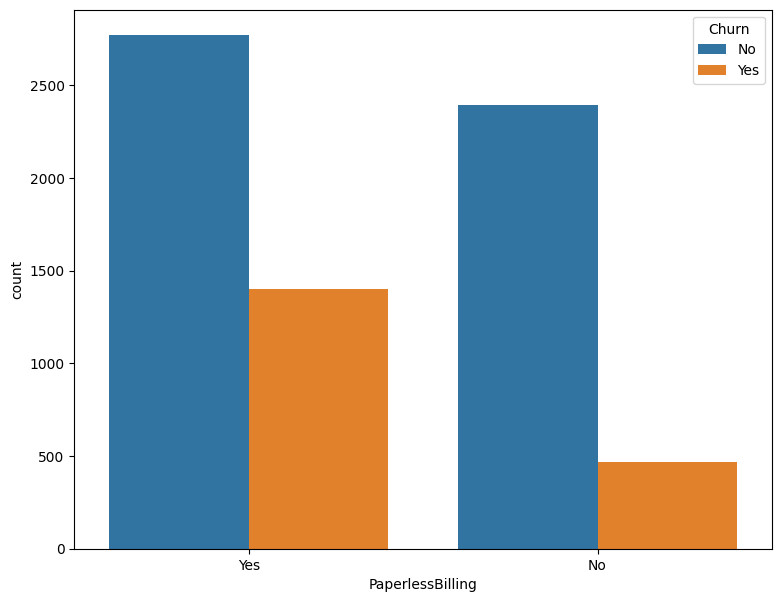

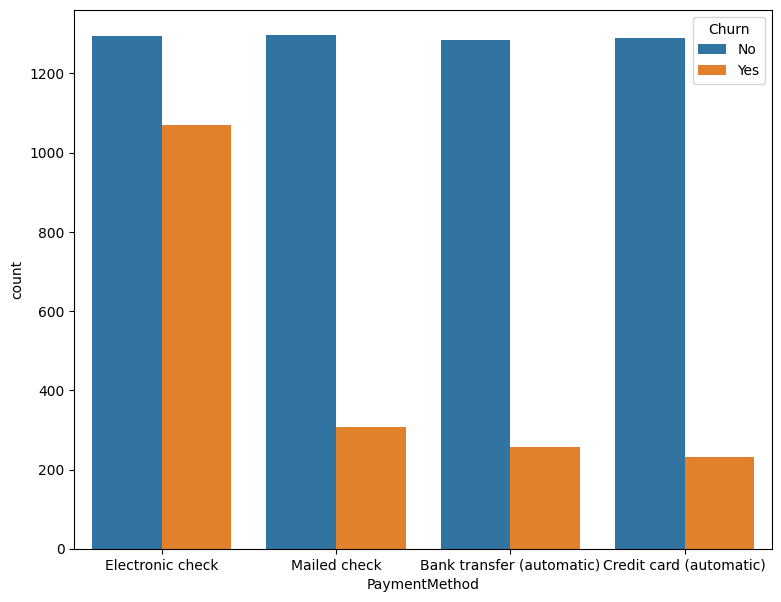

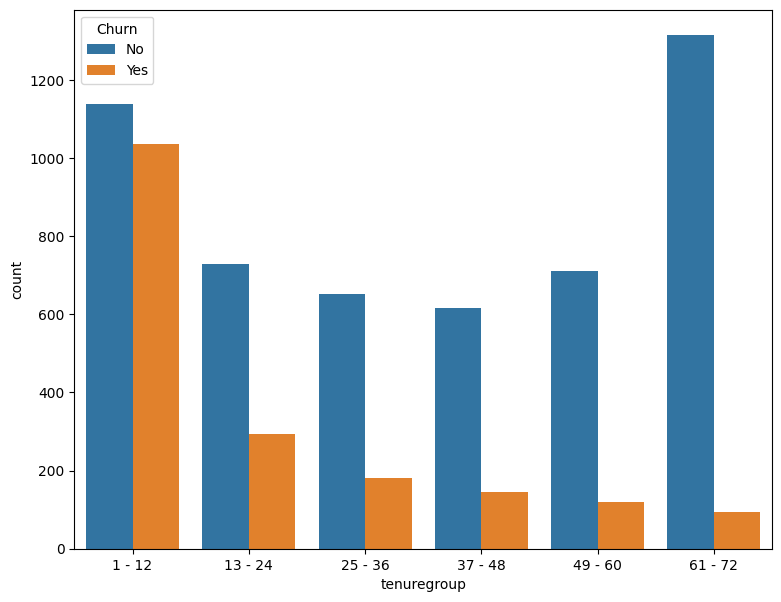

In [23]:
# Set the figsize for the charts
figsize = (9, 7)

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'Tenure'])):
    plt.figure(i, figsize=figsize)
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    sns.countplot(data=df, x=predictor, hue='Churn')

In [24]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLine', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenuregroup'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   object  
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   Tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLine      7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 non-nu

## Feature engineering

In [26]:
df =df[['PhoneService', 'MultipleLine', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges','Gender', 'SeniorCitizen', 'Partner', 'Dependents','tenuregroup','Churn']]

In [27]:
df.dtypes

PhoneService          object
MultipleLine          object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Gender                object
SeniorCitizen         object
Partner               object
Dependents            object
tenuregroup         category
Churn                 object
dtype: object

In [28]:
df.head()

,PhoneService,MultipleLine,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,tenuregroup,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,Yes,No,1 - 12,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Male,No,No,No,25 - 36,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,No,No,1 - 12,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,No,No,37 - 48,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,No,No,1 - 12,Yes


In [29]:
#Assign input and output 
x = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [30]:
x['tenuregroup'] = x['tenuregroup'].astype(object)

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PhoneService      7032 non-null   object 
 1   MultipleLine      7032 non-null   object 
 2   InternetService   7032 non-null   object 
 3   OnlineSecurity    7032 non-null   object 
 4   OnlineBackup      7032 non-null   object 
 5   DeviceProtection  7032 non-null   object 
 6   TechSupport       7032 non-null   object 
 7   StreamingTV       7032 non-null   object 
 8   StreamingMovies   7032 non-null   object 
 9   Contract          7032 non-null   object 
 10  PaperlessBilling  7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Gender            7032 non-null   object 
 15  SeniorCitizen     7032 non-null   object 
 16  Partner           7032 non-null   object 
 17  

In [32]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify = y)

In [33]:
# Create Column Transformer with 3 types of transformers
num_features = x_train.select_dtypes(exclude="object").columns
cat_features = x_train.select_dtypes(include="object").columns

In [35]:
print(num_features)
print(cat_features)

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['PhoneService', 'MultipleLine', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenuregroup'],
      dtype='object')


In [36]:

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 4499 to 272
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PhoneService      4922 non-null   object 
 1   MultipleLine      4922 non-null   object 
 2   InternetService   4922 non-null   object 
 3   OnlineSecurity    4922 non-null   object 
 4   OnlineBackup      4922 non-null   object 
 5   DeviceProtection  4922 non-null   object 
 6   TechSupport       4922 non-null   object 
 7   StreamingTV       4922 non-null   object 
 8   StreamingMovies   4922 non-null   object 
 9   Contract          4922 non-null   object 
 10  PaperlessBilling  4922 non-null   object 
 11  PaymentMethod     4922 non-null   object 
 12  MonthlyCharges    4922 non-null   float64
 13  TotalCharges      4922 non-null   float64
 14  Gender            4922 non-null   object 
 15  SeniorCitizen     4922 non-null   object 
 16  Partner           4922 non-null   object 
 17

In [37]:
# Preprocessing of train data

from sklearn.preprocessing import StandardScaler, LabelEncoder

num_features = x_train.select_dtypes(exclude="object").columns
cat_features = x_train.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
le = LabelEncoder()

# Encoding categorical features
for feature in cat_features:
    x_train[feature] = le.fit_transform(x_train[feature])

# Scaling numeric features
x_train[num_features] = numeric_transformer.fit_transform(x_train[num_features])


In [38]:
x_train

,PhoneService,MultipleLine,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,tenuregroup
4499,1,2,1,2,0,0,0,0,0,0,1,2,0.444749,-0.607066,0,0,0,1,0
1933,1,0,2,1,1,1,1,1,1,1,1,3,-1.492135,-0.823672,1,0,0,0,1
4668,1,0,0,2,0,0,0,0,2,0,1,1,-0.120451,-0.950975,0,0,0,1,0
5681,1,0,0,0,0,2,2,2,0,1,0,0,-0.021293,-0.081500,0,1,1,0,2
3610,1,2,1,0,0,2,0,2,2,0,1,0,1.166949,-0.495086,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,1,0,0,0,2,0,2,0,0,0,0,2,-0.353472,-0.430041,1,0,0,1,1
3451,1,0,1,0,0,0,0,0,0,1,1,0,0.201812,0.993692,1,1,1,0,5
4135,1,2,0,2,2,2,2,2,2,2,1,1,0.927318,0.477390,0,0,1,1,2
4249,1,0,0,0,2,2,0,0,2,1,1,3,0.034897,-0.716478,0,0,1,1,0


In [ ]:
x_train.columns

In [39]:
# Preprocessing of test data

num_features_test = x_test.select_dtypes(exclude="object").columns
cat_features_test = x_test.select_dtypes(include="object").columns

# Encoding categorical features
for feature in cat_features_test:
    x_test[feature] = le.fit_transform(x_test[feature])

# Scaling numeric features
x_test[num_features_test] = numeric_transformer.fit_transform(x_test[num_features_test])

In [69]:
df.columns

Index(['PhoneService', 'MultipleLine', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenuregroup', 'Churn'],
      dtype='object')

In [76]:
print(df['OnlineSecurity'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['Contract'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())
print(df['PhoneService'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingTV'].unique())




['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [ ]:
x_test

In [ ]:
x_train

In [40]:
# Label encoding target variable 
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
y_test

In [41]:
#####Train Logistic Regression Algorithm

#Import LogisticRegression() function
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression classifier
class_model = LogisticRegression(random_state=0)

#Train the Logistic Regression algorithm using train set
class_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
x_test

In [ ]:
x_train.columns

In [42]:
#Apply model
y_pred=class_model.predict(x_test)

In [43]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.tail()

,Actual,Predicted
2105,0,0
2106,0,0
2107,0,1
2108,0,0
2109,0,1


In [44]:
pd.crosstab(y_pred,y_test)

col_0,0,1
row_0,,
0,1366,250
1,183,311


In [45]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.63      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110



## Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
model = rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [5,10,15,25,50,100,200,400]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:
#rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=4,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

In [ ]:
rf_randomcv.best_params_

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth': [5, 10, 15, 25, 50, 100, 200, 400], 
    'min_samples_split': [2, 5, 10, 14], 
    'min_samples_leaf': [1, 2, 4, 6, 8], 
    'criterion': ['entropy', 'gini']    
}

print(param_grid)

In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=2,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

## Decision Tree Classifer

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(x_train,y_train)


In [ ]:
y_pred=model_dt.predict(x_test)
y_pred


In [ ]:
model_dt.score(x_test,y_test)


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)


In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_processed,y)

In [ ]:
# resampled
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)


In [ ]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
from sklearn import metrics
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

## Random Forest (from tutorial)

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [47]:
model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [48]:
y_pred=model_rf.predict(x_test)


In [49]:
model_rf.score(x_test,y_test)


0.7819905213270142

In [50]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [51]:
import pickle

In [52]:
filename = 'churn_predict.pkl'


In [53]:
pickle.dump(model_rf, open(filename, 'wb'))

In [54]:
# load model

loaded_model = pickle.load(open('churn_predict.pkl', 'rb'))

In [55]:
loaded_model

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [56]:
input_data = (80,1000.00,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not churn')
else:
  print('The person is churn')

[0]
The person is not churn


In [58]:
list(x_train.columns)

['PhoneService',
 'MultipleLine',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenuregroup']

In [ ]:
x_train.head()

In [ ]:
x_train['DeviceProtection'].value_counts()

In [62]:
df.columns

Index(['PhoneService', 'MultipleLine', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenuregroup', 'Churn'],
      dtype='object')

array(['No phone service', 'No', 'Yes'], dtype=object)